In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

In [116]:
data = pd.read_csv(r"C:\Users\USER\Desktop\RFM Based Customer Segmentation\data\bank_data_C.csv")
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


## Data Cleaning 

In [119]:
#find missing data
missing_data=data.isnull()
missing_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1041609,False,False,False,False,False,False,False,False,False
1041610,False,False,False,False,False,False,False,False,False
1041611,False,False,False,False,False,False,False,False,False
1041612,False,False,False,False,False,False,False,False,False


In [120]:
#COUNT MISSING VALUES IN EACH COLUMN
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")      

TransactionID
TransactionID
False    1041614
Name: count, dtype: int64

CustomerID
CustomerID
False    1041614
Name: count, dtype: int64

CustomerDOB
CustomerDOB
False    1041614
Name: count, dtype: int64

CustGender
CustGender
False    1041614
Name: count, dtype: int64

CustLocation
CustLocation
False    1041614
Name: count, dtype: int64

CustAccountBalance
CustAccountBalance
False    1041614
Name: count, dtype: int64

TransactionDate
TransactionDate
False    1041614
Name: count, dtype: int64

TransactionTime
TransactionTime
False    1041614
Name: count, dtype: int64

TransactionAmount (INR)
TransactionAmount (INR)
False    1041614
Name: count, dtype: int64



In [121]:
#find duplicate
data.duplicated().sum()

0

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [124]:
data.describe(include ='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [125]:
df=data

In [126]:
# Convert dates
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce', dayfirst=True)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_11680\1441814414.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce', dayfirst=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11680\1441814414.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [128]:
# Identify and fix dates in the future (assuming dataset is from 2016)
today = pd.Timestamp('2016-12-31')

# Reparse suspicious future dates using monthfirst=True
mask_future = df['CustomerDOB'] > today
df.loc[mask_future, 'CustomerDOB'] = pd.to_datetime(df.loc[mask_future, 'CustomerDOB'].dt.strftime('%m/%d/%Y'), errors='coerce', monthfirst=True)
df

TypeError: to_datetime() got an unexpected keyword argument 'monthfirst'

In [129]:
# Define a cutoff date to detect invalid DOBs
today = pd.Timestamp('2016-12-31')

# Find rows where DOB is in the future
mask_future = df['CustomerDOB'] > today

# Convert those DOBs back to string format
dob_str = df.loc[mask_future, 'CustomerDOB'].dt.strftime('%m/%d/%Y')

# Reparse with monthfirst=True
df.loc[mask_future, 'CustomerDOB'] = pd.to_datetime(dob_str, errors='coerce', dayfirst=False)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [135]:
def adjust_year(date):
    if pd.notnull(date) and date.year > 2016:
        return date.replace(year=date.year - 100)
    return date

df["CustomerDOB"] = df["CustomerDOB"].apply(adjust_year)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [136]:
df['CustomerAge'] = ((df['TransactionDate'] - df['CustomerDOB']).dt.days // 365).astype('Int64')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38


In [141]:
#check for missing or neative Age
negative_age=df[df['CustomerAge'] < 0]  # or df['CustomerAge'].isna()
print(negative_age)

Empty DataFrame
Columns: [TransactionID, CustomerID, CustomerDOB, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR), CustomerAge]
Index: []


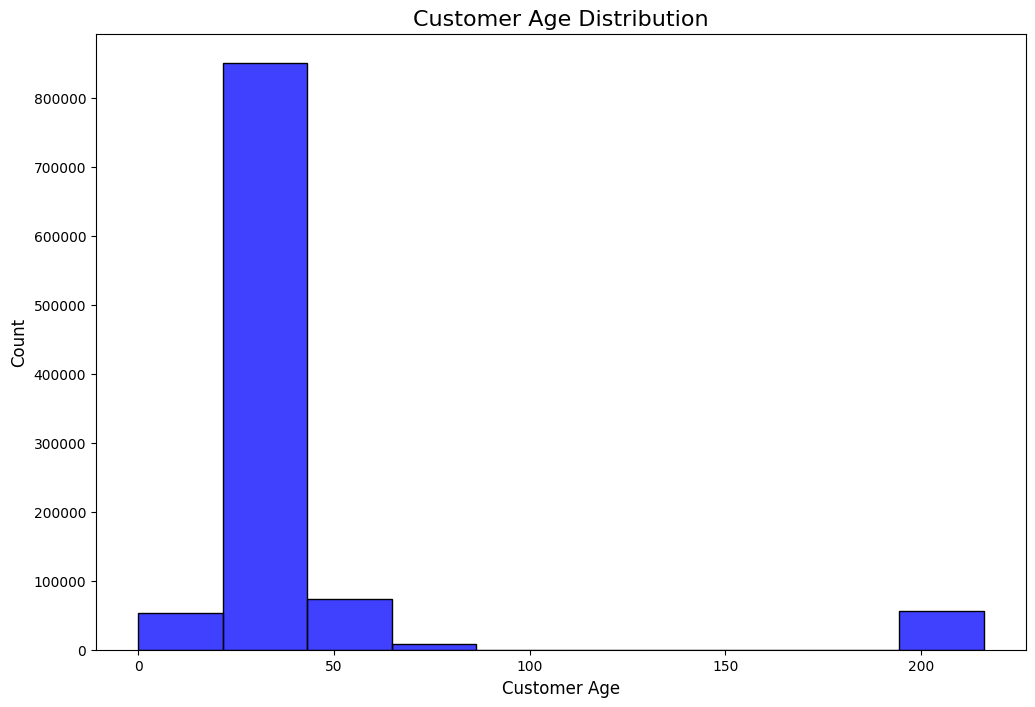

In [160]:
#age distribution to identify outliers in the age 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(df['CustomerAge'], bins=10, kde=False, color='blue', edgecolor='black')

plt.title("Customer Age Distribution", fontsize=16)
plt.xlabel("Customer Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(False)
plt.show()

The histogram titled "Customer Age Distribution" shows a significant issue with the data: it contains unrealistic age values. Here's a breakdown of what stands out:

Main Cluster: Most of the customer ages fall between 20 and 60 years, which is expected and reasonable.

Outliers:

There are values near 0, which may represent data entry errors (e.g., newborns or missing data encoded as zero).

There's a small but visible spike at over 200 years, which is biologically implausible. This is likely due to incorrect data entry or a placeholder/default value in the dataset.

In [161]:
#identify Invalid age based on DOB to detect unusual or incorrect birth dates that may have caused incorrect age calculations (e.g., resulting in unrealistic ages like 200 years).
df[df["CustomerAge"] > 100]["CustomerDOB"].unique()


<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [162]:
#replace outliers
def replace_age_outlier(data):
    DOB_threshold = 1900  # flag unrealistic DOBs before 1900

    # Get indices of outlier DOBs
    age_outliers = data[data["CustomerDOB"].dt.year < DOB_threshold].index

    # Calculate the average DOB from valid entries
    mean_DOB = data.loc[~data.index.isin(age_outliers), "CustomerDOB"].mean()

    # Replace invalid DOBs with the mean DOB
    data.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return data

df = replace_age_outlier(df)

# Recalculate CustomerAge
df["CustomerAge"] = (df["TransactionDate"] - df["CustomerDOB"]).dt.days // 365
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38


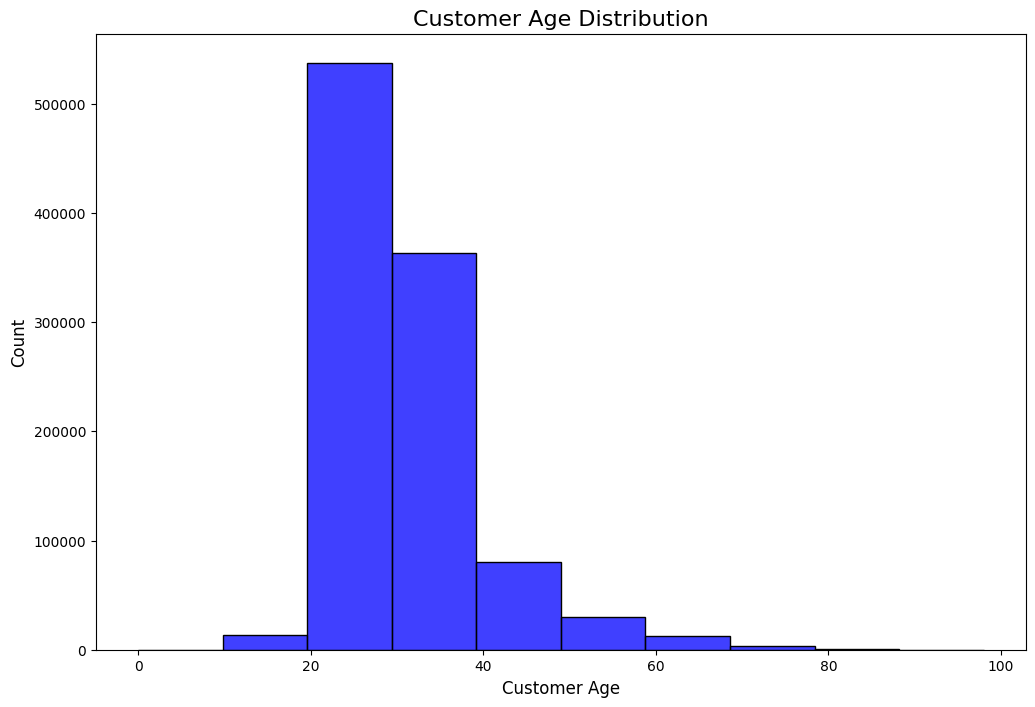

In [163]:
plt.figure(figsize=(12, 8))
sns.histplot(df['CustomerAge'], bins=10, kde=False, color='blue', edgecolor='black')

plt.title("Customer Age Distribution", fontsize=16)
plt.xlabel("Customer Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(False)
plt.show()

In [167]:
#GENDER
df['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_11680\4216142523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


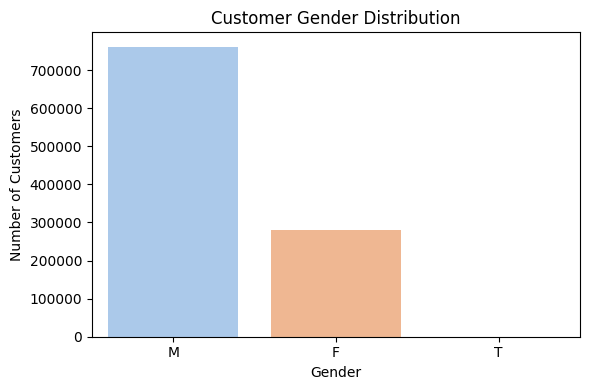

In [169]:
# Count the occurrences of each gender
gender_counts = df['CustGender'].value_counts()

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

Here's the bar chart showing the distribution of customer genders. You can clearly see the dominance of male customers, followed by female customers, and a single outlier entry for "T".

In [170]:
# Show all rows where CustGender is 'T'
df[df['CustGender'] == 'T']


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
953529,T959988,C3380368,1985-06-20 13:29:33.551387264,T,CHENNAI,50050.0,2016-09-10,170731,32500.0,31


In [171]:
# Replace 'T' with the most frequent gender, which is 'M'
df['CustGender'] = df['CustGender'].replace('T', 'M')

# Verify cleanup
cleaned_gender_counts = df['CustGender'].value_counts()
cleaned_gender_counts

CustGender
M    760979
F    280635
Name: count, dtype: int64

In [174]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

In [178]:
df['CustAccountBalance'].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

In [179]:
df['TransactionAmount (INR)'].sort_values()

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [181]:
df['TransactionAmount (INR)'].sort_values(ascending =True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [182]:
#check for customer with ) 0 amount
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

820

In [186]:
#remove transaction with 0 amount
df.drop(df[df['TransactionAmount (INR)']==0].index.tolist(), axis = 0, inplace=True)

In [187]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

0

In [190]:
df.head(20)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-01-10 00:00:00.000000000,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,22
1,T2,C2142763,1957-04-04 00:00:00.000000000,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,59
2,T3,C4417068,1996-11-26 00:00:00.000000000,F,MUMBAI,17874.44,2016-08-02,142712,459.00,19
3,T4,C5342380,1973-09-14 00:00:00.000000000,F,MUMBAI,866503.21,2016-08-02,142714,2060.00,42
4,T5,C9031234,1988-03-24 00:00:00.000000000,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50,28
5,T6,C1536588,1972-10-08 00:00:00.000000000,F,ITANAGAR,53609.20,2016-08-02,173940,676.00,43
6,T7,C7126560,1992-01-26 00:00:00.000000000,F,MUMBAI,973.46,2016-08-02,173806,566.00,24
7,T8,C1220223,1982-01-27 00:00:00.000000000,M,MUMBAI,95075.54,2016-08-02,170537,148.00,34
8,T9,C8536061,1988-04-19 00:00:00.000000000,F,GURGAON,14906.96,2016-08-02,192825,833.00,28
9,T10,C6638934,1984-06-22 00:00:00.000000000,M,MUMBAI,4279.22,2016-08-02,192446,289.11,32


In [189]:
df.describe(include = 'all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
count,1040794,1040794,1040794,1040794,1040794,1.040794e+06,1040794,1.040794e+06,1.040794e+06,1.040794e+06
unique,1040794,878763,NaN,2,9271,NaN,NaN,NaN,NaN,NaN
top,T1,C1736254,NaN,M,MUMBAI,NaN,NaN,NaN,NaN,NaN
freq,1,6,NaN,760311,101918,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1985-06-20 10:52:08.854044928,NaN,NaN,1.149199e+05,2016-08-25 04:48:33.720102400,1.571710e+05,1.567330e+03,3.073006e+01
min,NaN,NaN,1918-05-03 00:00:00,NaN,NaN,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,1.000000e-02,0.000000e+00
25%,NaN,NaN,1982-07-19 00:00:00,NaN,NaN,4.728540e+03,2016-08-12 00:00:00,1.241032e+05,1.614700e+02,2.500000e+01
50%,NaN,NaN,1987-04-02 00:00:00,NaN,NaN,1.676385e+04,2016-08-25 00:00:00,1.643050e+05,4.589000e+02,2.900000e+01
75%,NaN,NaN,1991-02-23 00:00:00,NaN,NaN,5.739893e+04,2016-09-06 00:00:00,2.000278e+05,1.200000e+03,3.400000e+01
max,NaN,NaN,2016-02-22 00:00:00,NaN,NaN,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06,9.800000e+01


## Exploratory Data Analysis

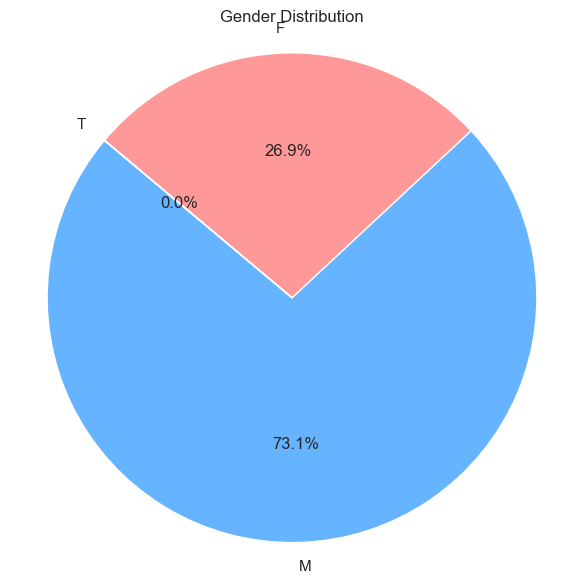

In [197]:
# --------- Gender Distribution ---------
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie circular
plt.tight_layout()
plt.show()

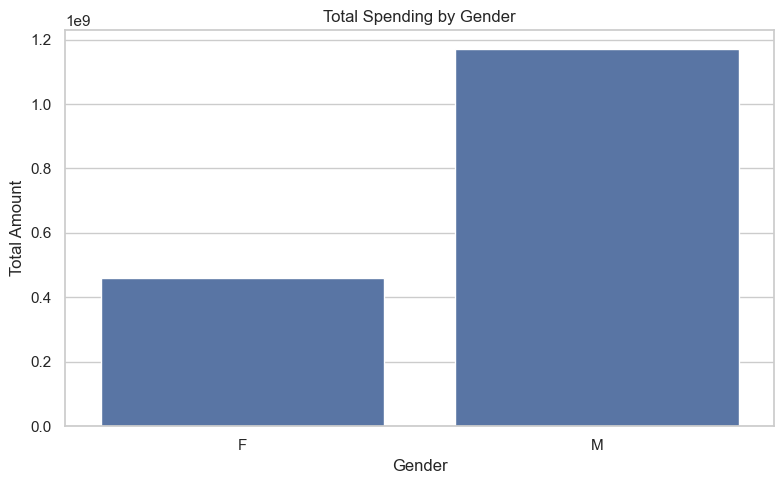

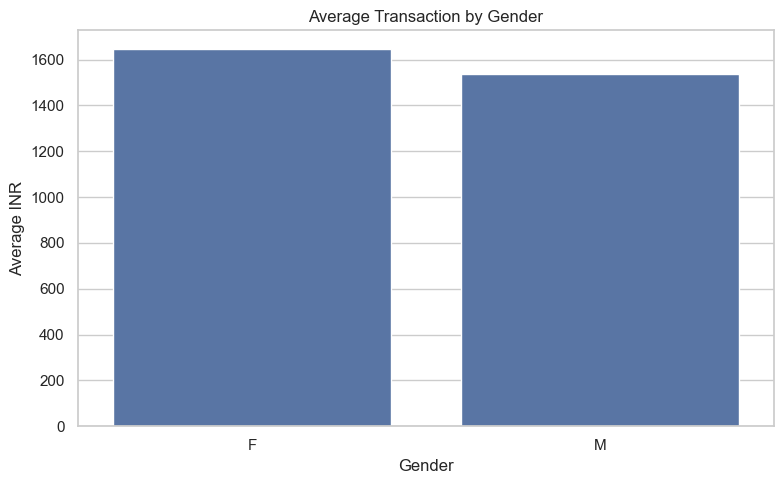

In [196]:
# Average & total transaction by gender
gender_spending = df.groupby('CustGender').agg(
    avg_transaction=('TransactionAmount (INR)', 'mean'),
    total_spending=('TransactionAmount (INR)', 'sum'),
    count=('TransactionID', 'count')
).reset_index()

# Plot total spending
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_spending, x='CustGender', y='total_spending')
plt.title("Total Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()


# Plot average spending
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_spending, x='CustGender', y='avg_transaction')
plt.title("Average Transaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Average INR")
plt.tight_layout()
plt.show()


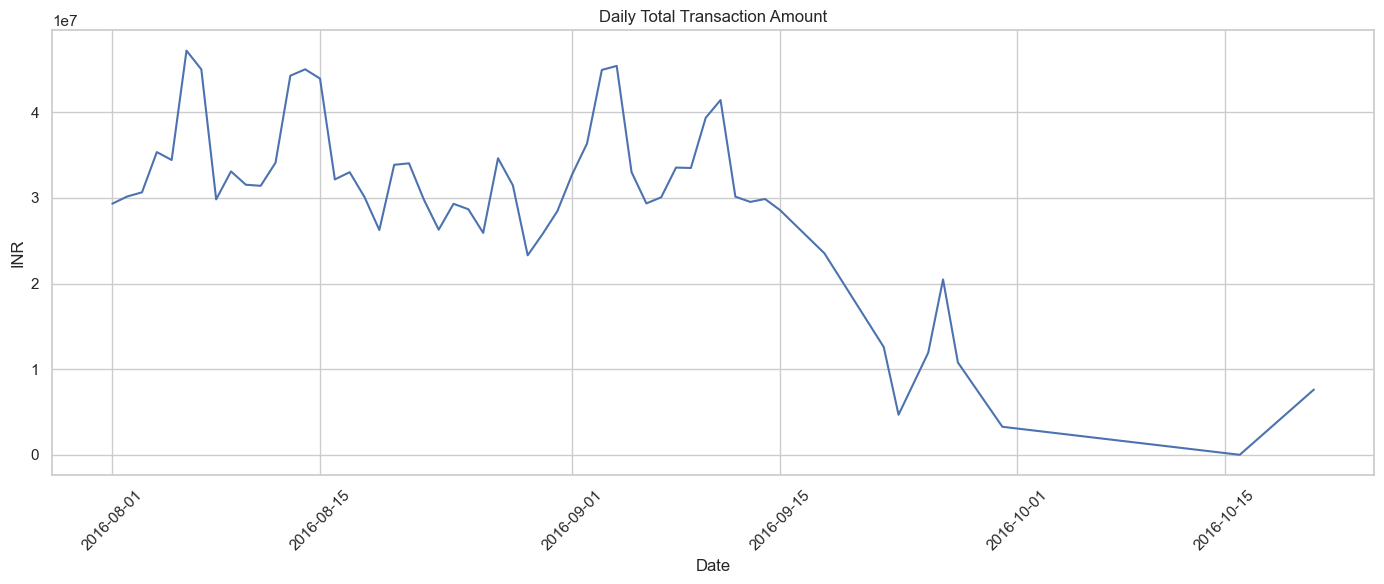

In [198]:
# Daily transaction value and count
daily_trend = df.groupby('TransactionDate').agg(
    daily_total_amount=('TransactionAmount (INR)', 'sum'),
    daily_count=('TransactionID', 'count')
).reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trend, x='TransactionDate', y='daily_total_amount')
plt.title("Daily Total Transaction Amount")
plt.xlabel("Date")
plt.ylabel("INR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

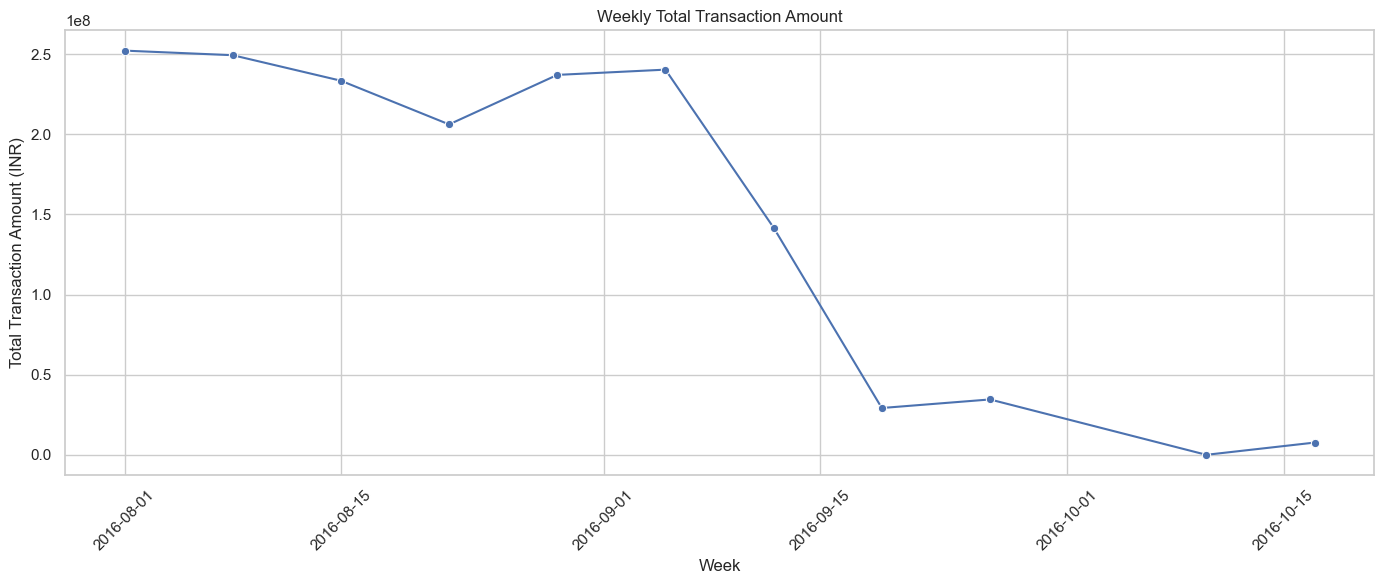

In [201]:
# Weekly Transaction Value
df['Week'] = df['TransactionDate'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_trend = df.groupby('Week')['TransactionAmount (INR)'].sum().reset_index()

# Plotting Weekly Trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_trend, x='Week', y='TransactionAmount (INR)', marker='o')
plt.title("Weekly Total Transaction Amount")
plt.xlabel("Week")
plt.ylabel("Total Transaction Amount (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

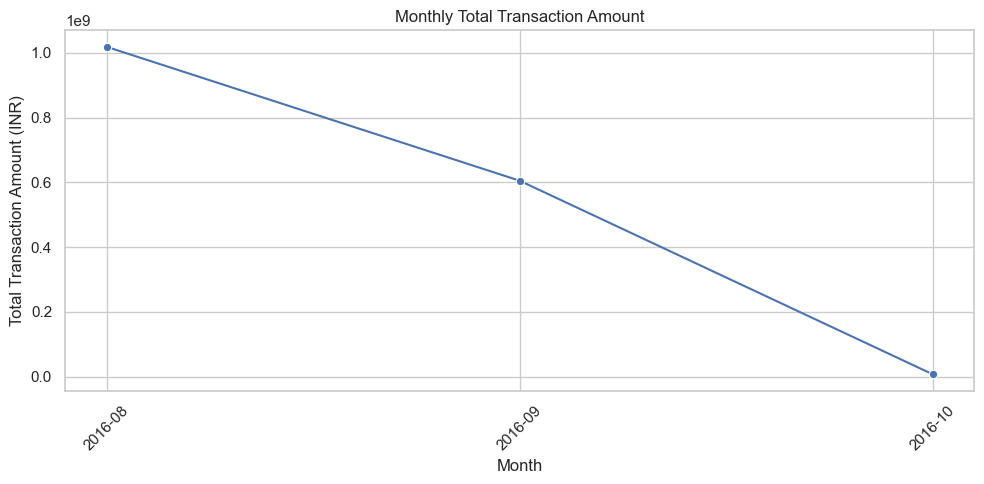

In [208]:
# Monthly Transaction Value
df['Month'] = df['TransactionDate'].dt.to_period('M').astype(str)
monthly_trend = df.groupby('Month')['TransactionAmount (INR)'].sum().reset_index()

# Plotting Monthly Trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Month', y='TransactionAmount (INR)', marker ='o' )
plt.title("Monthly Total Transaction Amount")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

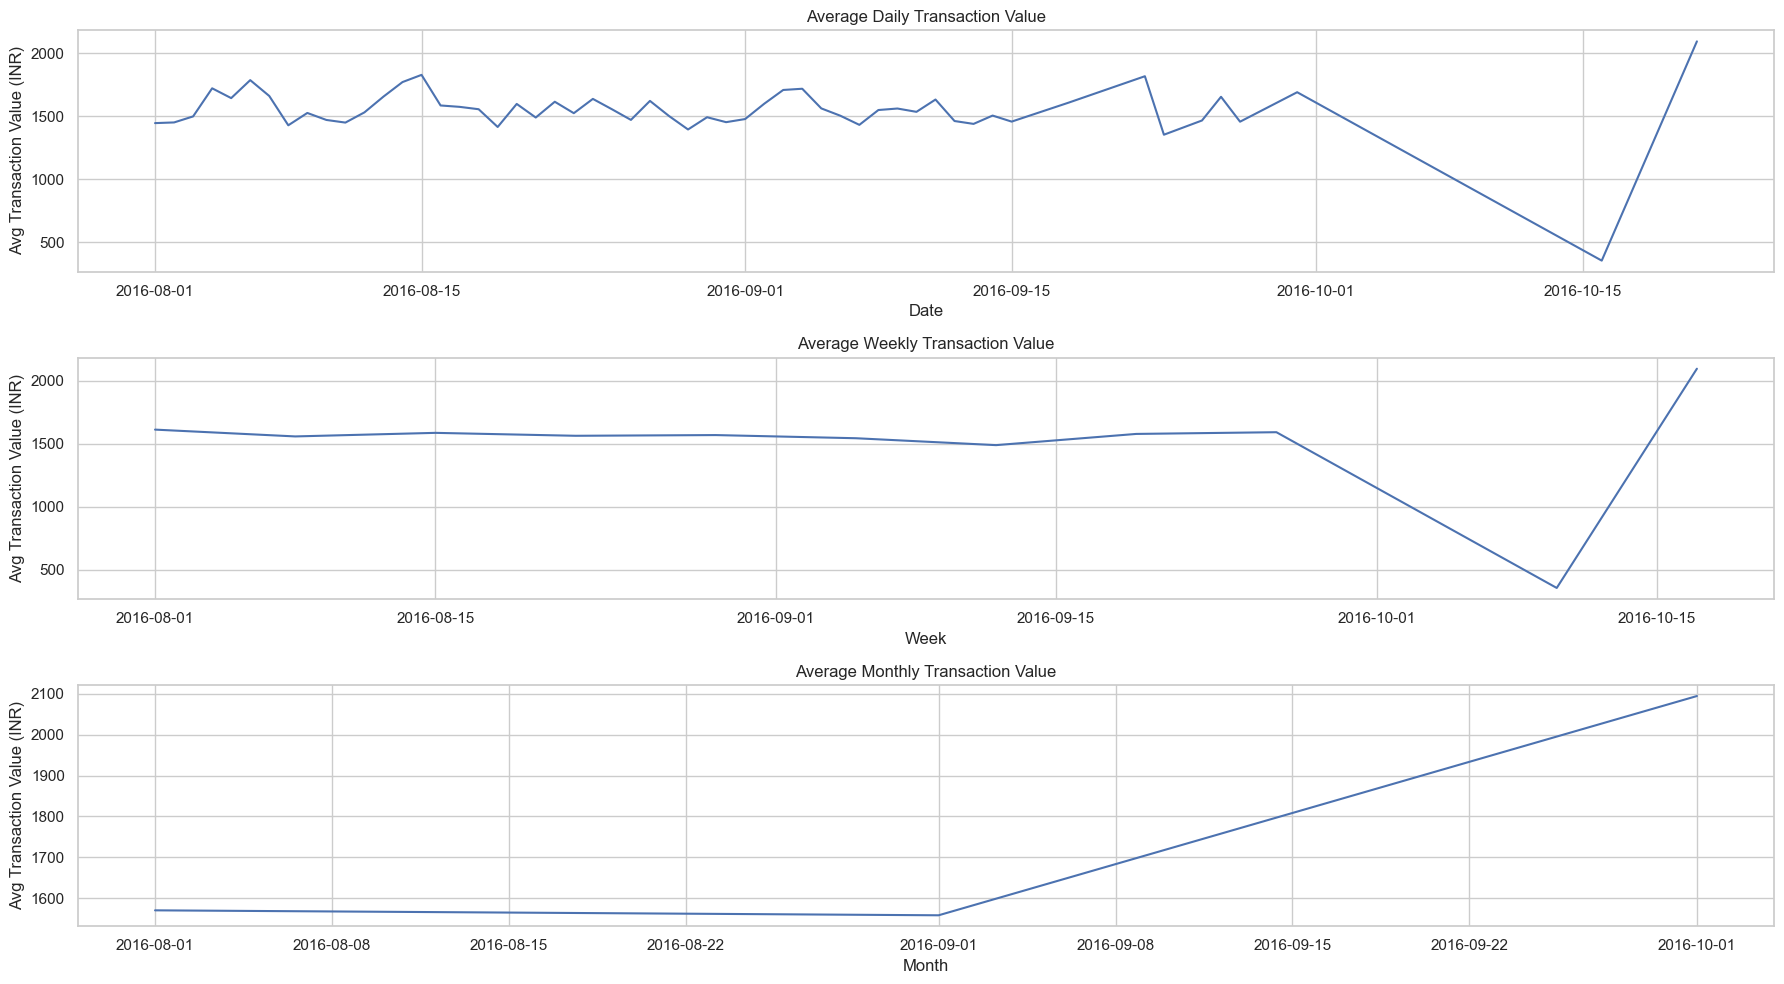

In [212]:

# Grouping by day, week, and month — and calculating average transaction value per group
daily_avg = df.groupby(df['TransactionDate'].dt.date)['TransactionAmount (INR)'].mean()
weekly_avg = df.groupby(df['TransactionDate'].dt.to_period('W'))['TransactionAmount (INR)'].mean()
monthly_avg = df.groupby(df['TransactionDate'].dt.to_period('M'))['TransactionAmount (INR)'].mean()

# Convert PeriodIndex to timestamp for plotting
weekly_avg.index = weekly_avg.index.to_timestamp()
monthly_avg.index = monthly_avg.index.to_timestamp()

# Plotting
plt.figure(figsize=(18, 10))

# Daily Average
plt.subplot(3, 1, 1)
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title('Average Daily Transaction Value')
plt.xlabel('Date')
plt.ylabel('Avg Transaction Value (INR)')

# Weekly Average
plt.subplot(3, 1, 2)
sns.lineplot(x=weekly_avg.index, y=weekly_avg.values)
plt.title('Average Weekly Transaction Value')
plt.xlabel('Week')
plt.ylabel('Avg Transaction Value (INR)')

# Monthly Average
plt.subplot(3, 1, 3)
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Monthly Transaction Value')
plt.xlabel('Month')
plt.ylabel('Avg Transaction Value (INR)')

plt.tight_layout()
plt.show()


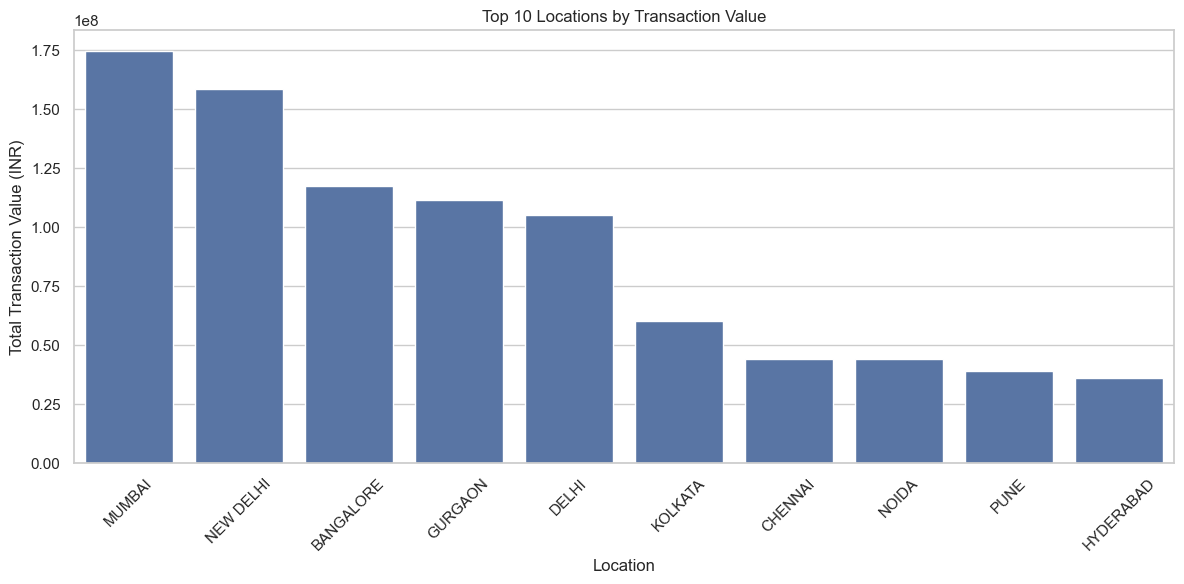

In [213]:
# Transaction count by location
top_locations = df.groupby('CustLocation').agg(
    total_amount=('TransactionAmount (INR)', 'sum'),
    transaction_count=('TransactionID', 'count')
).sort_values(by='total_amount', ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='CustLocation', y='total_amount')
plt.title("Top 10 Locations by Transaction Value")
plt.xticks(rotation=45)
plt.ylabel("Total Transaction Value (INR)")
plt.xlabel("Location")
plt.tight_layout()
plt.show()


## RFM ANALYSIS

In [219]:
# Set reference date as 1 day after last transaction
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                      # Frequency
    'TransactionAmount (INR)': 'sum'                               # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Show sample
print(rfm.head())

  CustomerID  Recency  Frequency  Monetary
0   C1010011       26          2    5106.0
1   C1010012       69          1    1499.0
2   C1010014       76          2    1455.0
3   C1010018       37          1      30.0
4   C1010024       65          1    5000.0


In [218]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0


## RFM SCORING AND SEGMENT MAPPING

In [220]:
# RFM Scoring (1 = lowest, 5 = highest for Frequency and Monetary; reversed for Recency)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [221]:
# Combine RFM score into a single column
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,C1010011,26,2,5106.0,5,5,5,555,15
1,C1010012,69,1,1499.0,2,1,4,214,7
2,C1010014,76,2,1455.0,1,5,4,154,10
3,C1010018,37,1,30.0,5,1,1,511,7
4,C1010024,65,1,5000.0,2,1,5,215,8
...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,5,3,153,9
878759,C9099877,37,1,222.0,5,5,2,552,12
878760,C9099919,65,1,126.0,2,5,1,251,8
878761,C9099941,55,1,50.0,3,5,1,351,9


In [222]:
# Segment Mapping based on RFM Score
def segment_customer(row):
    score = row['RFM_Score']
    if score >= 13:
        return 'Top Customers'
    elif row['R_Score'] in ['5', '4']:
        return 'Recent Customers'
    elif row['F_Score'] in ['5', '4']:
        return 'Frequent Buyers'
    elif row['M_Score'] in ['5', '4']:
        return 'Big Spenders'
    else:
        return 'At Risk'

rfm['CustomerSegment'] = rfm.apply(segment_customer, axis=1)

# Summary of segment counts
segment_counts = rfm['CustomerSegment'].value_counts()

rfm.head(), segment_counts


(  CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
 0   C1010011       26          2    5106.0       5       5       5   
 1   C1010012       69          1    1499.0       2       1       4   
 2   C1010014       76          2    1455.0       1       5       4   
 3   C1010018       37          1      30.0       5       1       1   
 4   C1010024       65          1    5000.0       2       1       5   
 
   RFM_Segment  RFM_Score CustomerSegment  
 0         555         15   Top Customers  
 1         214          7         At Risk  
 2         154         10         At Risk  
 3         511          7         At Risk  
 4         215          8         At Risk  ,
 CustomerSegment
 At Risk          768472
 Top Customers    110291
 Name: count, dtype: int64)

In [224]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,CustomerSegment
0,C1010011,26,2,5106.0,5,5,5,555,15,Top Customers
1,C1010012,69,1,1499.0,2,1,4,214,7,At Risk
2,C1010014,76,2,1455.0,1,5,4,154,10,At Risk
3,C1010018,37,1,30.0,5,1,1,511,7,At Risk
4,C1010024,65,1,5000.0,2,1,5,215,8,At Risk


In [225]:
segment_counts

CustomerSegment
At Risk          768472
Top Customers    110291
Name: count, dtype: int64

## KMEANS CLUSTERING WITH ELBOW METHOD

In [226]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [227]:
# Select RFM Features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_features

,Recency,Frequency,Monetary
0,26,2,5106.0
1,69,1,1499.0
2,76,2,1455.0
3,37,1,30.0
4,65,1,5000.0
...,...,...,...
878758,76,1,691.0
878759,37,1,222.0
878760,65,1,126.0
878761,55,1,50.0


In [228]:
#standardize the features
scaler = StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_features)
rfm_scaled

array([[-1.99039095,  1.8173276 ,  0.45193522],
       [ 0.83352617, -0.41084172, -0.04969314],
       [ 1.2932336 ,  1.8173276 , -0.05581225],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734],
       [-0.08588871, -0.41084172, -0.25120672],
       [-1.92471846, -0.41084172, -0.13925473]])

In [229]:
#apply the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)


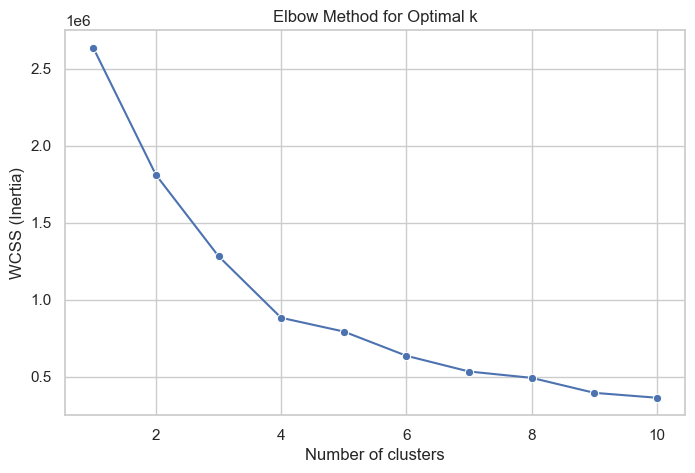

In [232]:
# Plot the elbow
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [234]:
#fit model with the optimal K (e.g 4)
Kmeans=KMeans(n_clusters = 4, random_state = 42)
rfm['Cluster'] = Kmeans.fit_predict(rfm_scaled)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,CustomerSegment,Cluster
0,C1010011,26,2,5106.0,5,5,5,555,15,Top Customers,1
1,C1010012,69,1,1499.0,2,1,4,214,7,At Risk,2
2,C1010014,76,2,1455.0,1,5,4,154,10,At Risk,1
3,C1010018,37,1,30.0,5,1,1,511,7,At Risk,0
4,C1010024,65,1,5000.0,2,1,5,215,8,At Risk,2
...,...,...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,5,3,153,9,At Risk,2
878759,C9099877,37,1,222.0,5,5,2,552,12,At Risk,0
878760,C9099919,65,1,126.0,2,5,1,251,8,At Risk,2
878761,C9099941,55,1,50.0,3,5,1,351,9,At Risk,0


In [240]:
# Calculate and print mean values for each RFM cluster
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,44.5,1.0,1287.3
1,48.6,2.1,2787.9
2,70.3,1.0,1318.8
3,54.1,1.4,79191.1


C:\Users\USER\AppData\Local\Temp\ipykernel_11680\1986692031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Recency', palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_11680\1986692031.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Frequency', palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_11680\1986692031.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Monetary', palette='viridis')


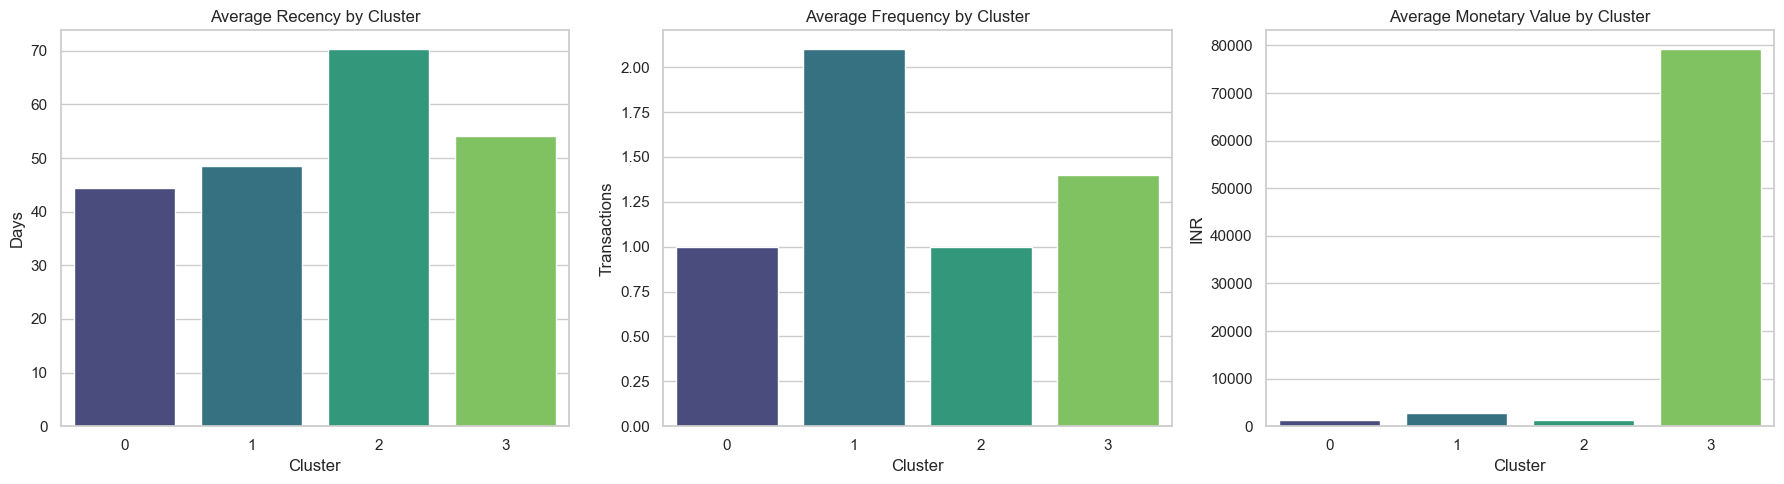

In [241]:


# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Plot average Recency by cluster
plt.subplot(1, 3, 1)
sns.barplot(data=cluster_summary, x='Cluster', y='Recency', palette='viridis')
plt.title('Average Recency by Cluster')
plt.ylabel('Days')
plt.xlabel('Cluster')

# Plot average Frequency by cluster
plt.subplot(1, 3, 2)
sns.barplot(data=cluster_summary, x='Cluster', y='Frequency', palette='viridis')
plt.title('Average Frequency by Cluster')
plt.ylabel('Transactions')
plt.xlabel('Cluster')

# Plot average Monetary by cluster
plt.subplot(1, 3, 3)
sns.barplot(data=cluster_summary, x='Cluster', y='Monetary', palette='viridis')
plt.title('Average Monetary Value by Cluster')
plt.ylabel('INR')
plt.xlabel('Cluster')

plt.tight_layout()
plt.show()


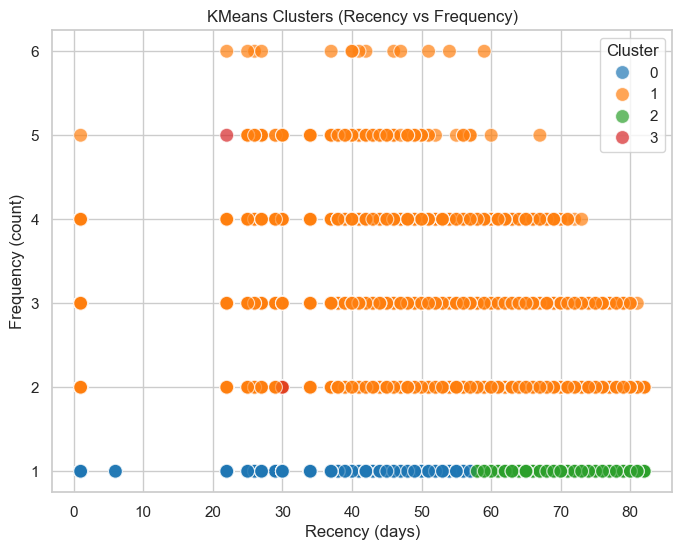

In [242]:
# Frequency vs Recency
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Recency', y='Frequency', 
    hue='Cluster', 
    data=rfm, 
    palette='tab10', 
    s=100, alpha=0.7
)
plt.title('KMeans Clusters (Recency vs Frequency)')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (count)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

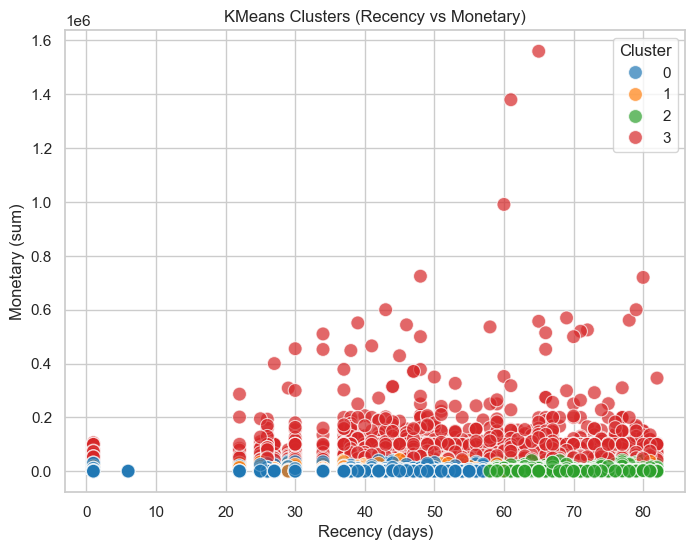

In [243]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Recency', y='Monetary', 
    hue='Cluster', 
    data=rfm, 
    palette='tab10', 
    s=100, alpha=0.7
)
plt.title('KMeans Clusters (Recency vs Monetary)')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (sum)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

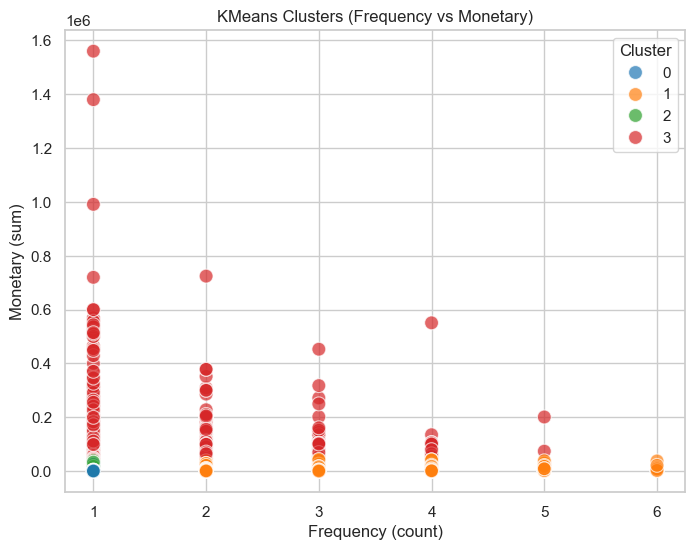

In [244]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Frequency', y='Monetary', 
    hue='Cluster', 
    data=rfm, 
    palette='tab10', 
    s=100, alpha=0.7
)
plt.title('KMeans Clusters (Frequency vs Monetary)')
plt.xlabel('Frequency (count)')
plt.ylabel('Monetary (sum)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11680\3831362497.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\USER\anaconda3\envs\tai_py\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


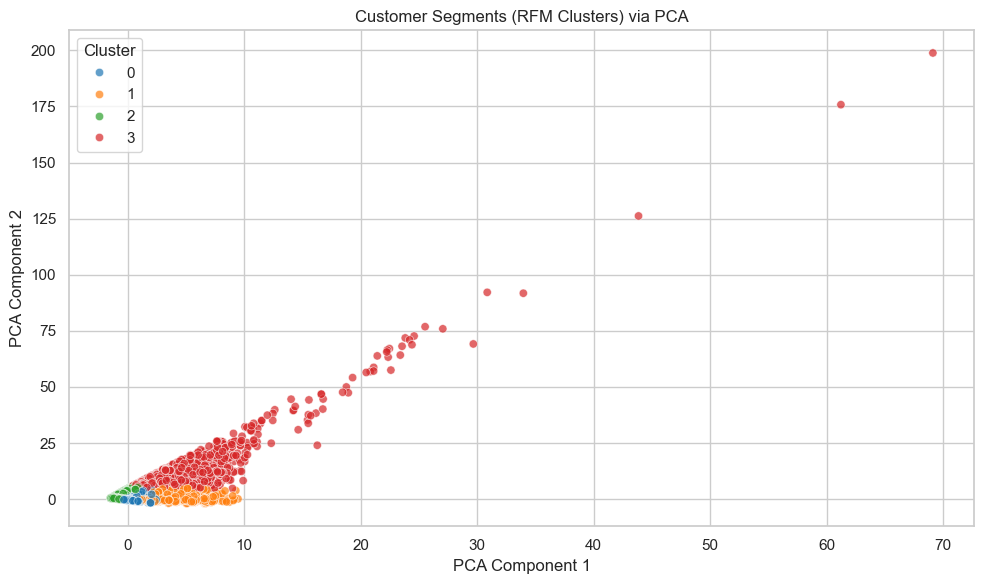

In [249]:
# PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = pca_components[:, 0]
rfm['PCA2'] = pca_components[:, 1]

# PCA-based Cluster Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title('Customer Segments (RFM Clusters) via PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [248]:
# Map segments based on cluster characteristics
def map_segment(row):
    if row['Cluster'] == 0:
        return "New/Infrequent Low Spenders"
    elif row['Cluster'] == 1:
        return "Potential Loyalists"
    elif row['Cluster'] == 2:
        return "At Risk/Churned Low Value"
    elif row['Cluster'] == 3:
        return "Big Spenders"

rfm['Segment'] = rfm.apply(map_segment, axis=1)

# Group by Segment for summary
segment_summary = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
segment_summary

,Recency,Frequency,Monetary
Segment,,,
At Risk/Churned Low Value,70.3,1.0,1318.8
Big Spenders,54.1,1.4,79191.1
New/Infrequent Low Spenders,44.5,1.0,1287.3
Potential Loyalists,48.6,2.1,2787.9


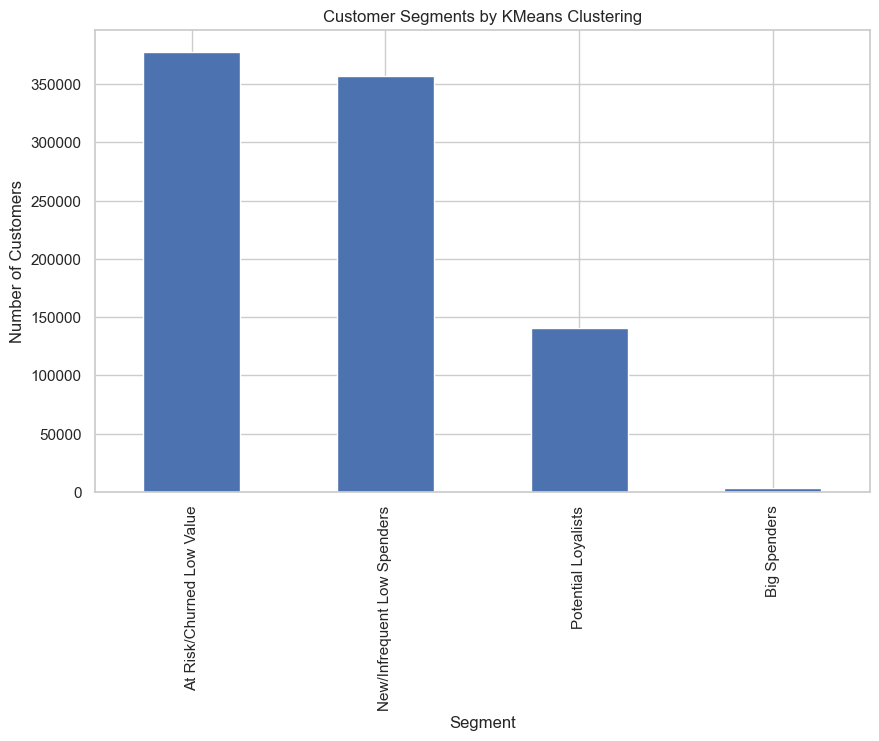

In [250]:
# print(rfm['ClusterLabel'].value_counts().sum())

rfm['Segment'].value_counts().plot(kind='bar', title='Customer Segments by KMeans Clustering', ylabel='Number of Customers', figsize=(10, 6))
plt.show()